# House Price Prediction using Linear Regression Case Study
The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town 

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles

River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate 10,000 dollor

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in 1000 dollor

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from sklearn.linear_model import LinearRegression

# Import Data

In [5]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [6]:
data = pd.read_csv("datasets_1815_3139_housing.csv", delim_whitespace=True, names=names)

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
data.shape

(506, 14)

In [9]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [10]:
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [11]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


# Viewing the data statistics

In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Plotting the heatmap of correlation between features

In [14]:
corr = data.corr()
corr.shape

(14, 14)

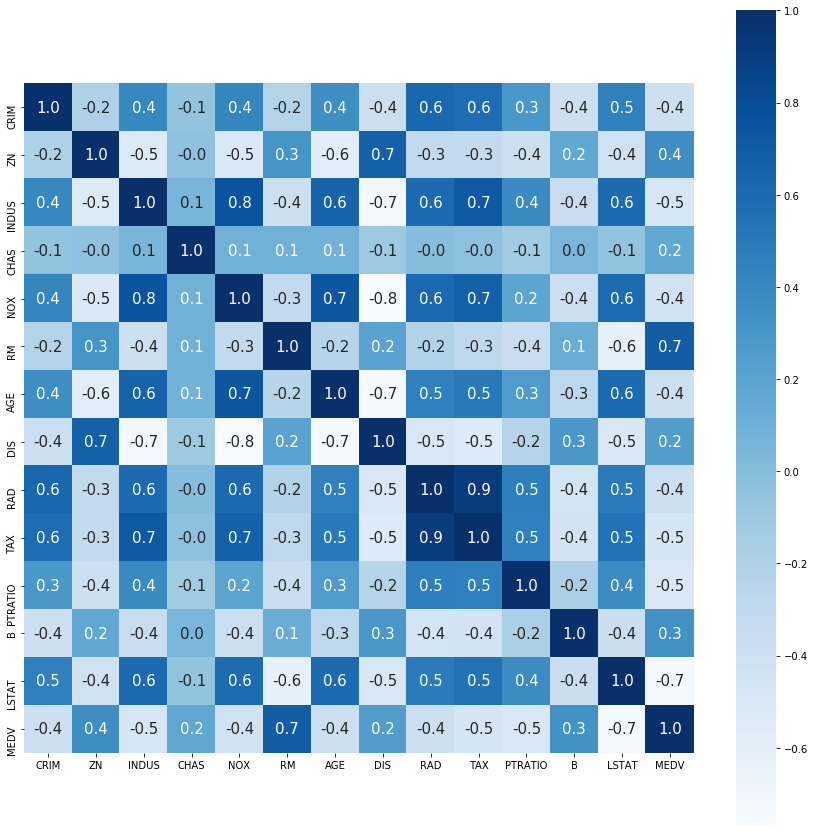

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

From Correlation matrix, We can confim that variable LSTAT, RM, AGE and PTRATIO have good corelation with our output variable MEDV. So we should consider them for the prediction.

On the other hand TAX and RAD are highly correlated with score 0.9.

So these feature pairs are strongly correlated to each other. We should not select both these features together for training the model. so we will consider to drop TAX.

Same goes for the features DIS and AGE which have a correlation of -0.7. Also DIS and NOX are highly correlated with score -0.8 and therefore will drop NOX

# dropping TAX, NOX and DIS

In [17]:
data.drop('TAX', axis=1, inplace=True)
data.drop('NOX', axis=1, inplace=True)
data.drop('DIS', axis=1, inplace=True)

In [18]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B',
       'LSTAT', 'MEDV'],
      dtype='object')

# Spliting target variable and independent variables¶

In [19]:
X = data.drop(['MEDV'], axis = 1)
y = data['MEDV']

# Splitting to training and testing data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)


# Create a Linear regressor

In [21]:
lr = LinearRegression()

# Train the model using the training sets

In [22]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Spliting target variable and independent variables

In [23]:
X = data.drop(['MEDV'], axis = 1)
y = data['MEDV']

# Splitting to training and testing data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# Create a Linear regressor

In [25]:
lr = LinearRegression()

# Train the model using the training sets

In [26]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Value of intercept

In [27]:
lr.intercept_

15.222485839755986

# Converting the coefficient values of the features

In [38]:
coeffcients_lr = pd.DataFrame([X_train.columns,lr.coef_]).T
coeffcients_lr = coeffcients_lr.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients_lr

,Attribute,Coefficients
0,CRIM,-0.0885305
1,ZN,-0.00280742
2,INDUS,-0.0676202
3,CHAS,5.00259
4,RM,3.96265
5,AGE,0.0190226
6,RAD,0.112767
7,PTRATIO,-0.87426
8,B,0.0104624
9,LSTAT,-0.545552


This values are nothing but our weights of the corresponding features. As you can see feature CHAS is more important.

# Model prediction on train data

In [37]:
y_pred = lr.predict(X_train)

# Model Evaluation on test data

In [30]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7009063484318245
MSE: 22.513027300357034
RMSE: 4.744789489572433


# Visualizing the differences between actual prices and predicted values

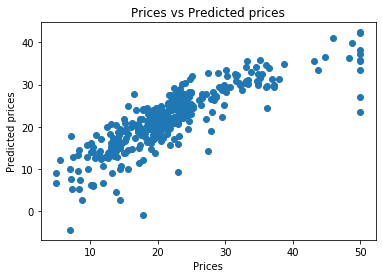

In [31]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

## Checking residuals or errors

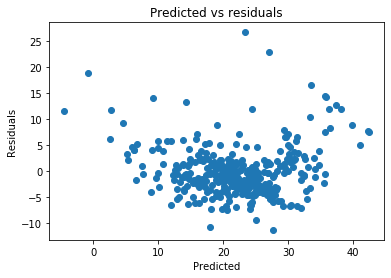

In [36]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

As we can see there is no pattern is observed in the residuals. So our linearity assumptions is satisfied.

# Predicting model on Test data

In [33]:
y_test_pred = lr.predict(X_test)

# Model Evaluation

In [34]:
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6847357289618736
MSE: 32.91991796968778
RMSE: 5.7375881666156365


By observing the model performance on the train and test data we can day that the model is not overfitting because its scores is almost matching with the test data.
